In [2]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

In [3]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [4]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 4  # time of evolution
omega = jnp.pi/T  # detuning2=1
eps = -4
Kb = 10

In [5]:
# operators
a, b = dq.destroy(na, nb)
# initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state
t_save = jnp.linspace(0, T, 50)  # save times
g2 = 1 # coupling strength

H_0 = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

In [6]:
#1.3 CHANGES FROM 1.1

alpha = jnp.sqrt(-eps/g2)


omega = 1.0  # detuning
T = 4
t_save = jnp.linspace(0, T, 50)  # save times

H_d = dq.modulated(lambda t: jnp.pi*t/(8*alpha*T) , (dq.dag(a) + a))

H = H_0 + H_d
    


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 238.66ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:03<00:00, 14.93it/s]


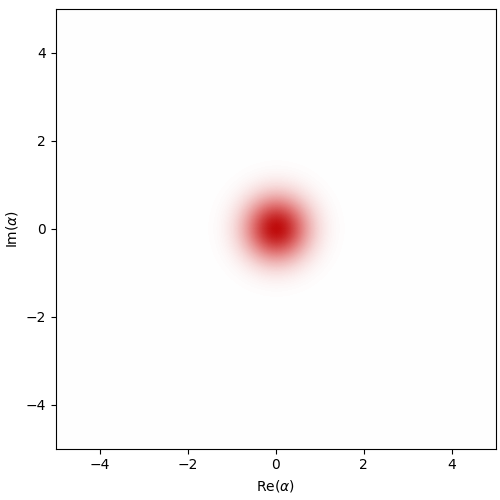

In [25]:



res = dq.mesolve(H, [jnp.sqrt(Kb)*b], psi0, t_save)

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a, fps=120)
# dq.plot.wigner_gif(res.states)

|          |   0.2% ◆ elapsed 76.06ms ◆ remaining 0.00ms

(4, 8, 50, 20, 20)


|██████████| 100.0% ◆ elapsed 01m54s ◆ remaining 0.00ms  
C:\Users\Aradh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


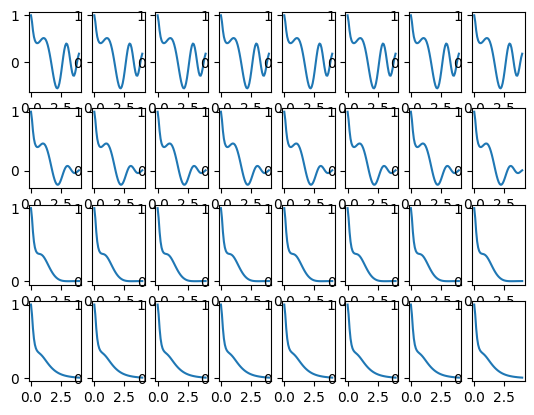

In [39]:
Ka_l = jnp.array([0.01,0.1,0.5,1,1.5,2,10,100])
T_z = jnp.linspace(1,4,4)
H_d = dq.modulated(lambda t: jnp.pi*t/(8*alpha*T ) , (dq.dag(a) + a))

exp_ops = [dq.parity(na*nb)]

res = dq.mesolve(H_0+H_d, [jnp.sqrt(Kb)*b , jnp.sqrt(Ka_l)[:, None, None]*a], psi0, t_save, exp_ops=exp_ops)    

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a
print(trace_a.shape)
for i in range(len(T_z)):
    for j in range(len(Ka_l)):
        parity = res.expects[0][i][j]
        plt.subplot(len(T_z),len(Ka_l),i*len(Ka_l)+j+1).plot(t_save,parity)
plt.show()